Pumpkins Prediction Model

C:\Users\artha\AppData\Local\Temp\ipykernel_26380\1350209514.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
C:\Users\artha\AppData\Local\Temp\ipykernel_26380\1350209514.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumkins.dropna(inplace=True)


-0.1409174155294009
-0.1439274635633735
<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 70 to 1708
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          468 non-null    int32  
 1   DayOfYear      468 non-null    int64  
 2   Variety        468 non-null    object 
 3   City           468 non-null    object 
 4   Package        468 non-null    object 
 5   Low Price      468 non-null    float64
 6   High price     468 non-null    float64
 7   Average Price  468 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 31.1+ KB


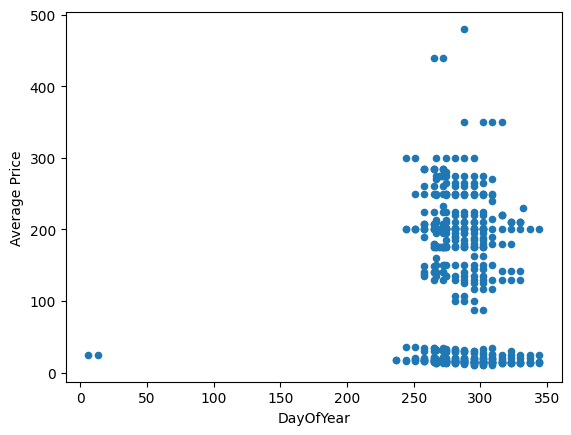

In [6]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

#reading the csv file
pumkins=pd.read_csv('../ML/US-pumpkins.csv')

#printing first five rows
pumkins.head()

#calculating the null values in each column
pumkins.isnull().sum()

#selecting the important columns and printing first five rows
columns_to_select=['Package','Low Price', 'High Price', 'Date']
pumkins.loc[:,columns_to_select].head()


#calculating the average price
price=(pumkins['High Price']+pumkins['Low Price'])/2

#getting the month from the Date column
month=pd.DatetimeIndex(pumkins['Date']).month
day_of_year = pd.to_datetime(pumkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

#keeping the impotant columns in new dataframe
new_dataframe=pd.DataFrame({'Month': month,
                            'DayOfYear': day_of_year,
                            'Variety': pumkins['Variety'],
                            'City': pumkins['City Name'],
                            'Package': pumkins['Package'],
                            'Low Price': pumkins['Low Price'],
                            'High price': pumkins['High Price'],
                            'Average Price': price})

#Selecting the certain columns
pumkins=pumkins[pumkins['Package'].str.contains('bushel', case=True,regex=True)]


#Standadising it by some calculation
new_dataframe.loc[new_dataframe['Package'].str.contains('1 1/9'), 'Average Price']=price/(1 + 1/9)
new_dataframe.loc[new_dataframe['Package'].str.contains('1/2'), 'Average Price']=price/(1/2)

#Setting the x and y axis
x=new_dataframe['Average Price']
y=new_dataframe['Month']
z=new_dataframe['DayOfYear']

#grouping by the months and calculating the mean average price for each month
#new_dataframe.groupby(['Month'])['Average Price'].mean().plot(kind='bar')
#plt.ylabel("Average Price")

print(new_dataframe['Month'].corr(new_dataframe['Average Price']))
print(new_dataframe['DayOfYear'].corr(new_dataframe['Average Price']))

# colors=['red','blue','green','yellow']

# for i,var in enumerate(new_dataframe['Variety'].unique()):
#     df=new_dataframe[new_dataframe['Variety']==var]
#     ax=df.plot.scatter('DayOfYear','Average Price',ax=None,c=colors[i],label=var)

# new_dataframe.groupby('Variety')['Average Price'].mean().plot(kind='bar')

pie_pumkins=new_dataframe[new_dataframe['Variety']=='PIE TYPE']
pie_pumkins.plot.scatter('DayOfYear','Average Price')

pie_pumkins.dropna(inplace=True)
pie_pumkins.info()

Mean error: 1.02e+02 (78.8%)
Model determination:  0.003502523239329647


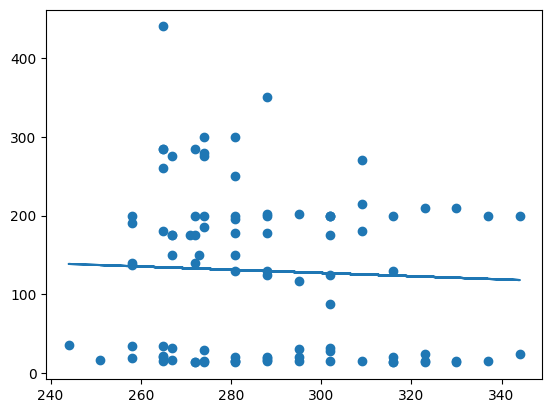

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X=pie_pumkins['DayOfYear'].to_numpy().reshape(-1,1)
y=pie_pumkins['Average Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


pred=lin_reg.predict(X_test)

mse=np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

Mean error: 1.02e+02 (78.3%)
Model determination:  0.003502523239329647
[164.86852778]


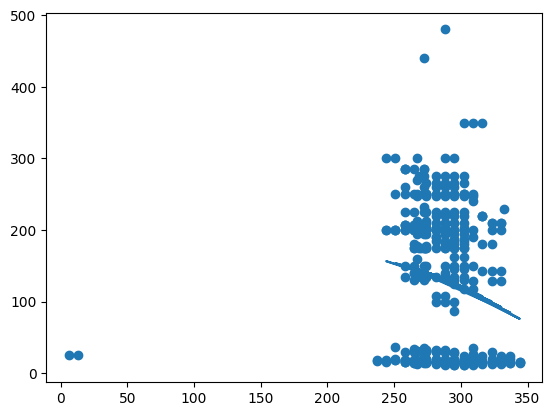

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

pipeline=make_pipeline(PolynomialFeatures(2),LinearRegression())

pipeline.fit(X_train,y_train)
predic=pipeline.predict(X_test)

mse=np.sqrt(mean_squared_error(y_test,predic))
print(f'Mean error: {mse:3.3} ({mse/np.mean(predic)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_train,y_train)
plt.plot(X_test,predic)

predict=pipeline.predict([[200]])
print(predict)

Logistic Regression

C:\Users\artha\AppData\Local\Temp\ipykernel_18584\3543924479.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068
[[162   4]
 [ 11  22]]


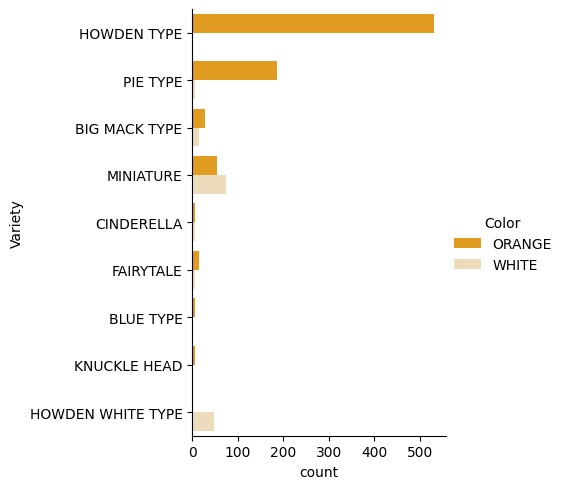

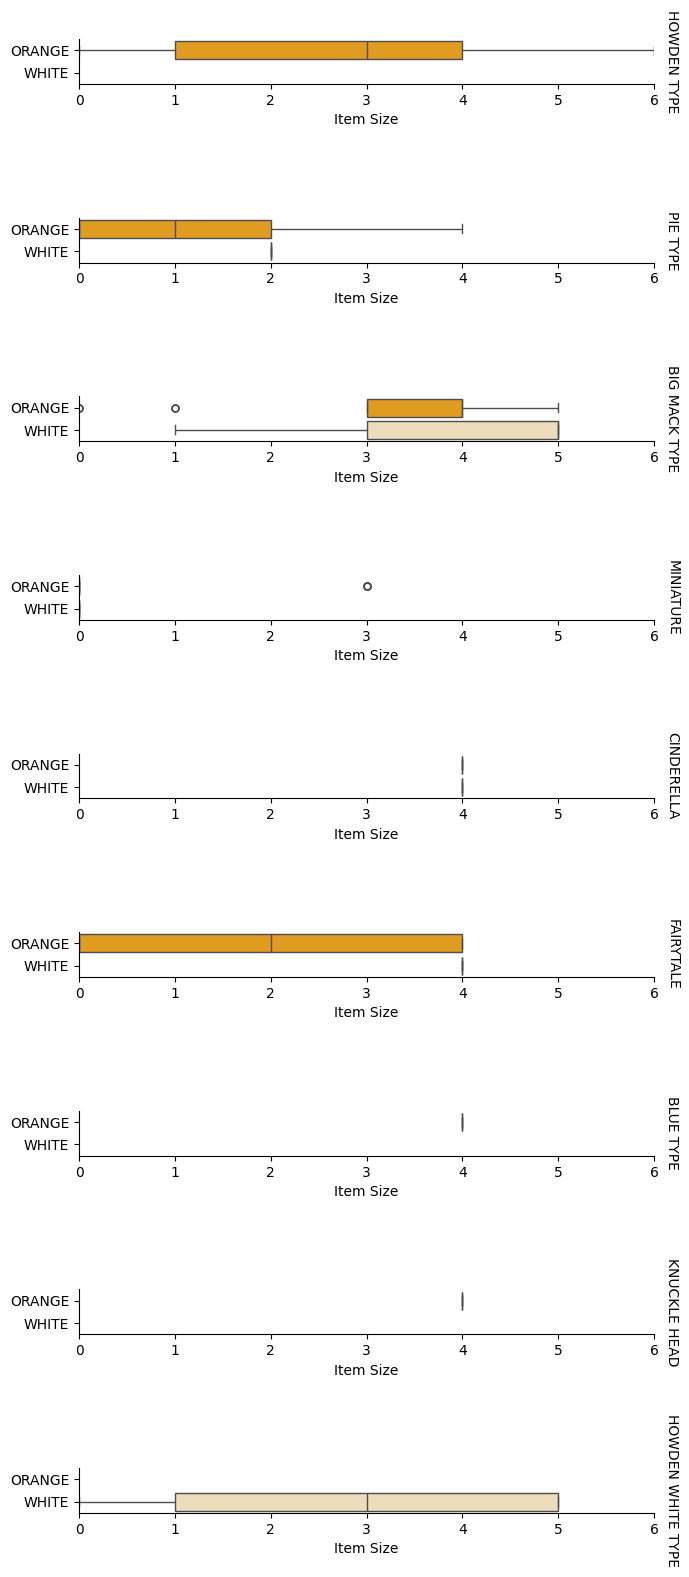

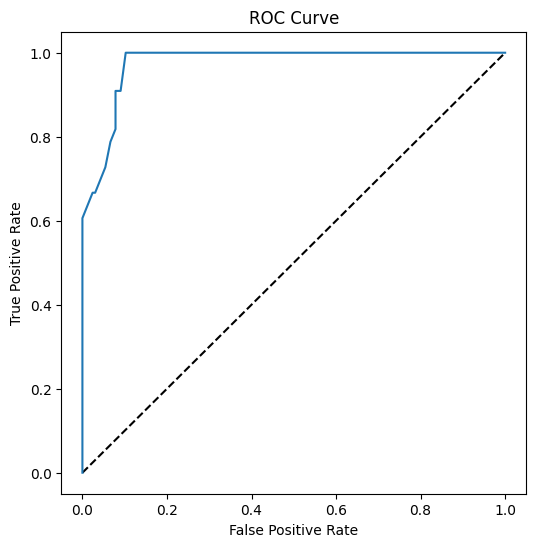

0.9749908725812341


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

pumpkins_data=pd.read_csv('../ML/US-pumpkins.csv')

columns_to_select=['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumkins=pumpkins_data.loc[:,columns_to_select]

pumkins.dropna(inplace=True)

palette= {
    'ORANGE': 'orange',
    'WHITE': 'wheat'
}

sns.catplot(data=pumkins,y='Variety',kind='count',hue='Color',palette=palette)

item_size_categories= [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features=['Item Size']
ordinal_encoder=OrdinalEncoder(categories=item_size_categories)

categorical_features=['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder=OneHotEncoder(sparse_output=False)

ct=ColumnTransformer(transformers=[
    ('ord',ordinal_encoder,ordinal_features),
    ('cat',categorical_encoder,categorical_features)
])

ct.set_output(transform='pandas')
encoded_features=ct.fit_transform(pumkins)

encoded_features.head()

label_encoder=LabelEncoder()
encoded_label=label_encoder.fit_transform(pumkins['Color'])

encoded_pumkins=encoded_features.assign(Color=encoded_label)

palette={
    'ORANGE': 'orange',
    'WHITE': 'wheat'
}

pumkins['Item Size']=encoded_pumkins['ord__Item Size']

g = sns.catplot(
    data=pumkins,
    x="Item Size", y="Color", row='Variety',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)

g.set(xlabel="Item Size", ylabel="").set(xlim=(0, 6))

g.set_titles(row_template="{row_name}")

X=encoded_pumkins[encoded_pumkins.columns.difference(['Color'])]
y=encoded_pumkins['Color']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

model=LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

print(classification_report(y_test,prediction))
print('Predicted labels: ', prediction)
print('F1-score: ', f1_score(y_test, prediction))

print(confusion_matrix(y_test,prediction))

y_scores=model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)